In [12]:
%load_ext autoreload
%autoreload 2

import matplotlib.pyplot as plt
import mplhep
mplhep.style.use(mplhep.style.ROOT)
from tqdm import tqdm
import polars as pl
plt.rcParams.update({'font.size': 20,
                     'grid.linestyle': '--',
                     'axes.grid': True,
                     'figure.autolayout': True,
                     'figure.figsize': [14,6]
                     })




The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


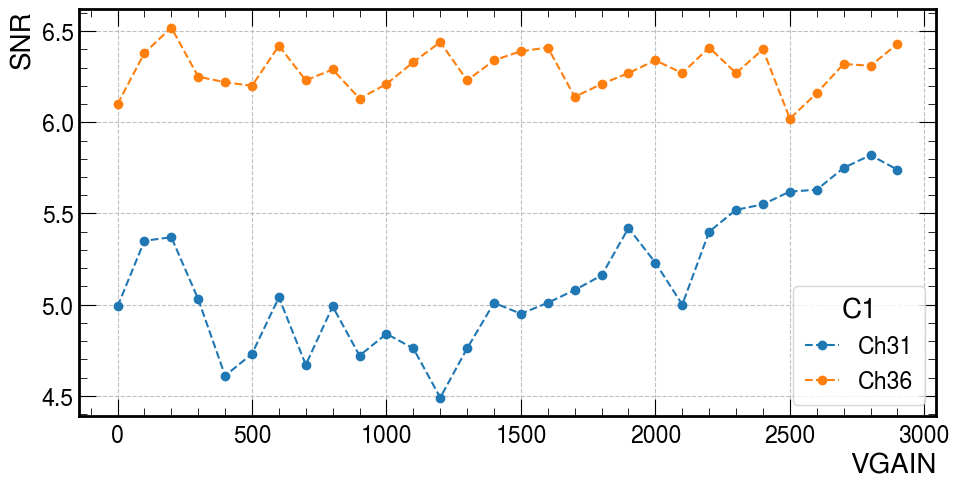

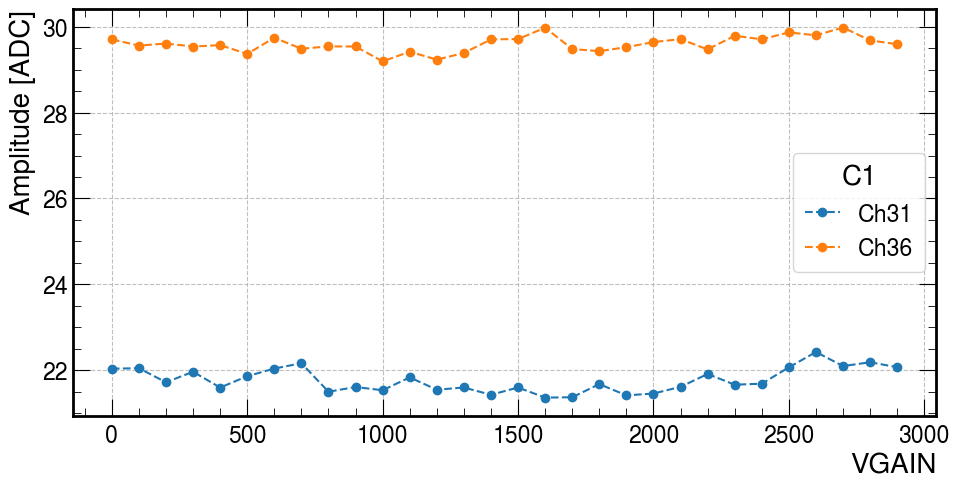

In [19]:
df = pl.read_csv("./VGAIN_SNR.csv")

def toplot(df:pl.DataFrame, ch:str):
    df = df.filter(pl.col(ch)!=-1)
    return df["VGAIN"], df[ch]

channel_per_module = {
        "C1": [31, 36],
        "C2": [30, 37],
        "C3": [41, 46],
        "C4": [40, 47],
        }

 
def theplot(module:str, type='SNR'):

    plt.figure(figsize=(10, 5.3))
    channels = channel_per_module[module]
    for ch in channels:
        _ch = type+"_"+str(ch)
        x, y = toplot(df, _ch)
        plt.plot(x, y, '--o', label=f'Ch{ch}')
    if type=='A':
        type='Amplitude [ADC]'
    plt.ylabel(type)
    plt.xlabel('VGAIN')
    plt.legend(title=module, frameon=True)
theplot("C1")
theplot("C1", "A")

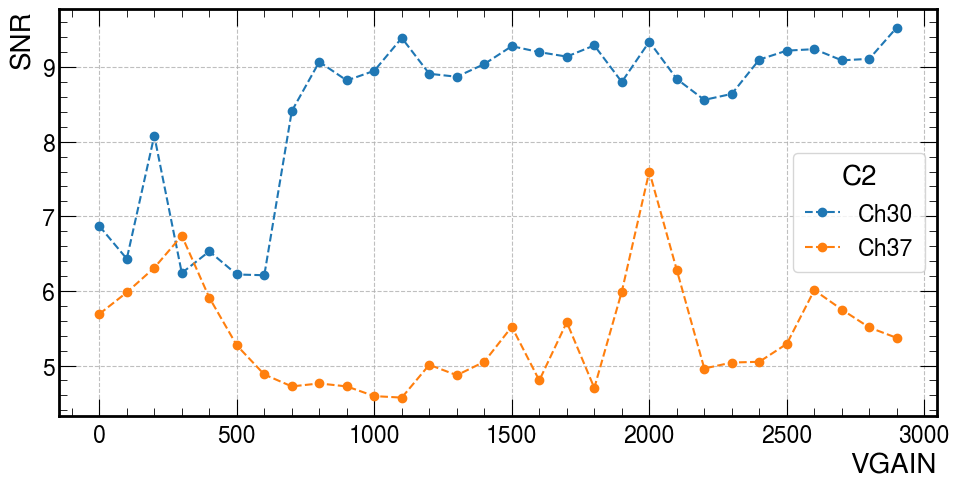

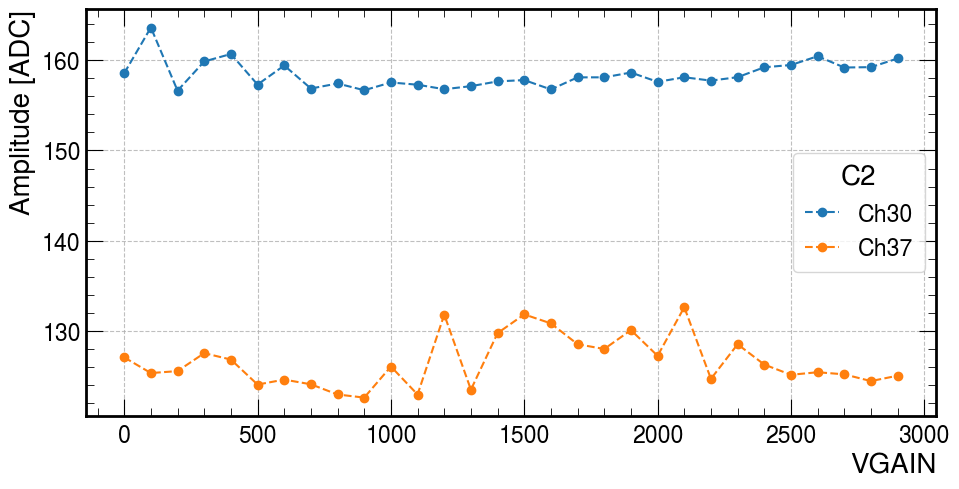

In [20]:
theplot("C2")
theplot("C2", "A")
# theplot("C2", "Q")

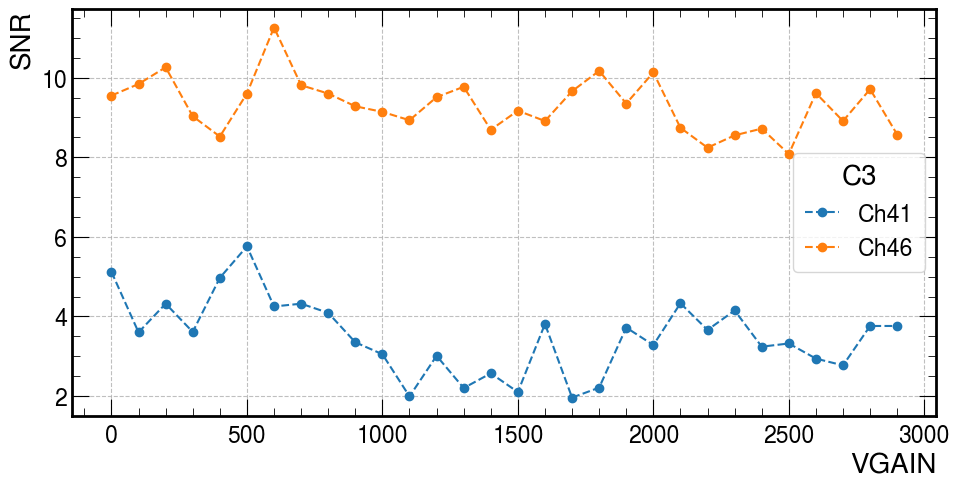

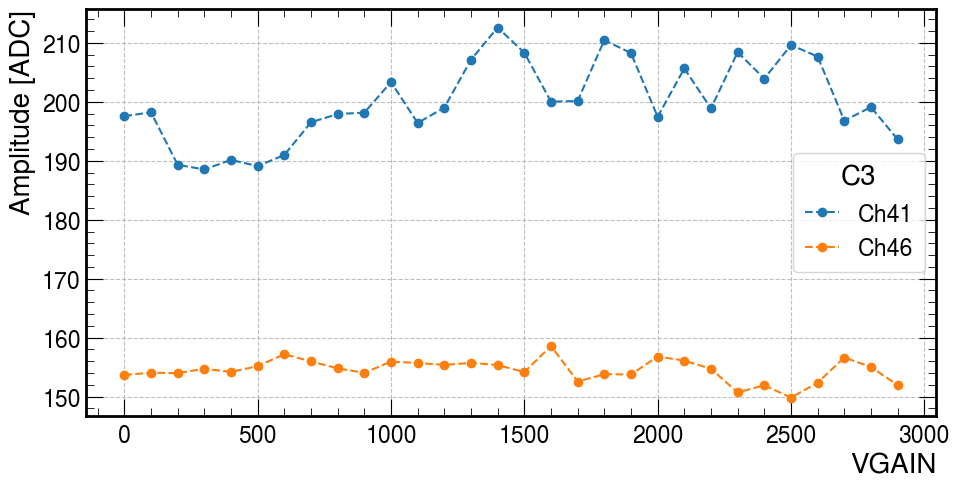

In [21]:
theplot("C3")
theplot("C3", "A")
# theplot("C3", "Q")

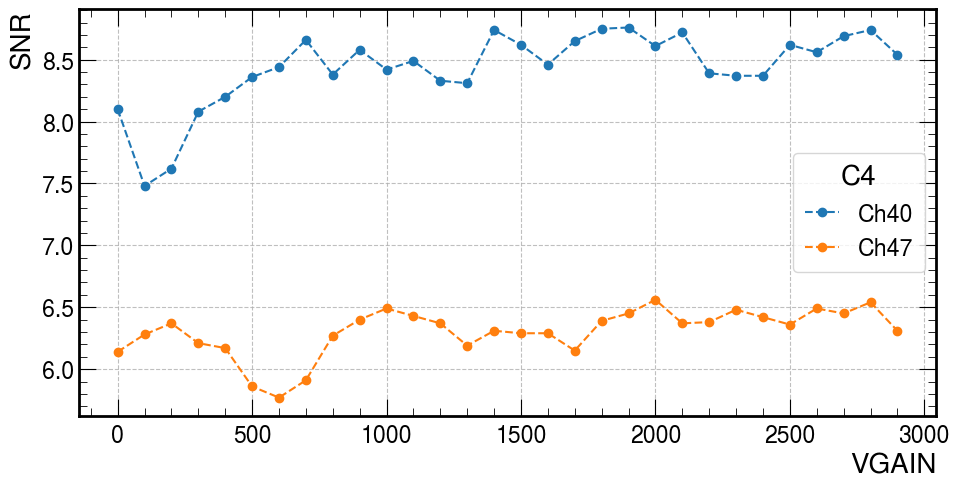

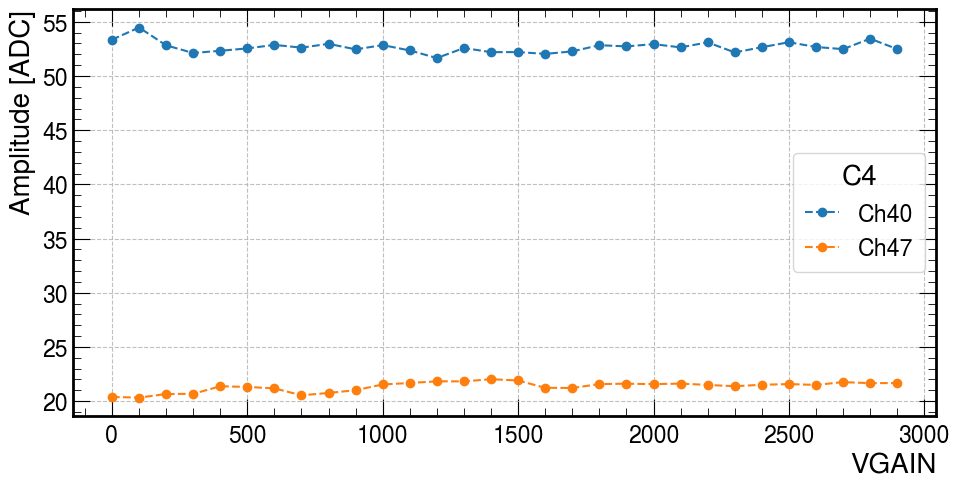

In [22]:
theplot("C4")
theplot("C4", "A")